# Read data

In [1]:
from warnings import filterwarnings 
filterwarnings("ignore")

import pandas as pd
A=pd.read_csv("C:/Users/Hp/Desktop/Datasets/50_Startups.csv")
A.head()

,RND,ADMIN,MKT,STATE,PROFIT
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


# How to increase profit(Focus should be there on which department)

<AxesSubplot:xlabel='STATE', ylabel='PROFIT'>

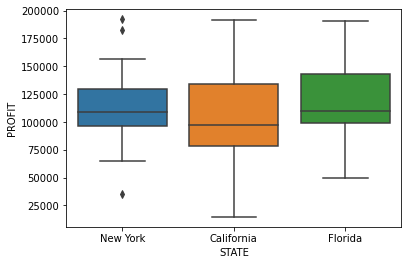

In [2]:
import seaborn as sb
sb.boxplot(A.STATE,A.PROFIT)

<AxesSubplot:xlabel='MKT', ylabel='PROFIT'>

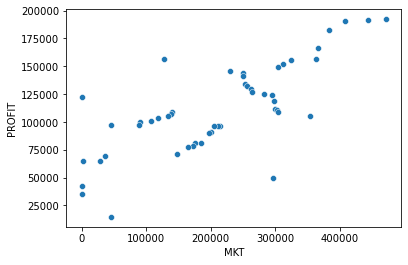

In [3]:
sb.scatterplot(A.MKT,A.PROFIT)

<AxesSubplot:xlabel='ADMIN', ylabel='PROFIT'>

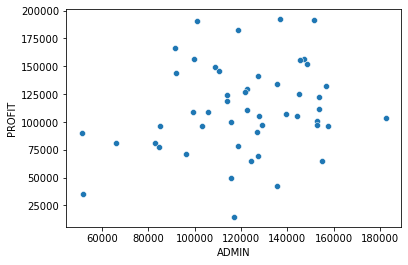

In [4]:
sb.scatterplot(A.ADMIN,A.PROFIT)

<AxesSubplot:xlabel='RND', ylabel='PROFIT'>

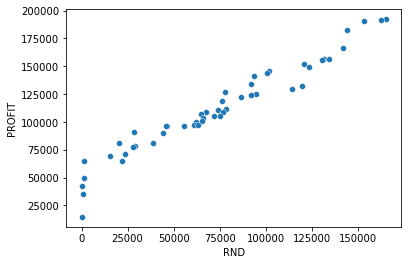

In [5]:
sb.scatterplot(A.RND,A.PROFIT)

In [6]:
A.corr()["PROFIT"]

RND       0.972900
ADMIN     0.200717
MKT       0.747766
PROFIT    1.000000
Name: PROFIT, dtype: float64

# Let us define X and Y

In [7]:
x=A[["RND"]]
y=A[["PROFIT"]]

# Divide Data in training and testing set(sequential)

In [8]:
A.shape

(50, 5)

In [9]:
x_train=x[0:40]
y_train=y[0:40]

In [10]:
x_train

,RND
0,165349.20
1,162597.70
2,153441.51
3,144372.41
4,142107.34
5,131876.90
6,134615.46
7,130298.13
8,120542.52
9,123334.88


In [11]:
y_train

,PROFIT
0,192261.83
1,191792.06
2,191050.39
3,182901.99
4,166187.94
5,156991.12
6,156122.51
7,155752.60
8,152211.77
9,149759.96


In [12]:
x_test=x[40:50]
y_test=y[40:50]

In [13]:
x_test

,RND
40,28754.33
41,27892.92
42,23640.93
43,15505.73
44,22177.74
45,1000.23
46,1315.46
47,0.00
48,542.05
49,0.00


In [14]:
y_test

,PROFIT
40,78239.91
41,77798.83
42,71498.49
43,69758.98
44,65200.33
45,64926.08
46,49490.75
47,42559.73
48,35673.41
49,14681.40


# Create a Regression model

# 1. Training

In [15]:
from sklearn.linear_model import LinearRegression
lr= LinearRegression()
model=lr.fit(x_train,y_train)

Fetch results of training
1.Intercept
2.slope

In [16]:
model.intercept_     #y intercept

array([53729.45413425])

In [17]:
b0=model.intercept_[0]

In [18]:
b0

53729.45413424719

In [19]:
model.coef_       #b1

array([[0.80825321]])

In [20]:
b1=model.coef_[0][0]

In [21]:
b1

0.8082532111796221

# 2. Testing

In [24]:
import pandas as pd
q = pd.DataFrame([x_test.RND,y_test.PROFIT]).T

In [25]:
q

,RND,PROFIT
40,28754.33,78239.91
41,27892.92,77798.83
42,23640.93,71498.49
43,15505.73,69758.98
44,22177.74,65200.33
45,1000.23,64926.08
46,1315.46,49490.75
47,0.00,42559.73
48,542.05,35673.41
49,0.00,14681.40


In [27]:
q["Predicted_PROFIT"] = round(b0+b1*q.RND,2)              # Create a new column called Predicted PROFIT
q

,RND,PROFIT,Predicted_PROFIT
40,28754.33,78239.91,76970.23
41,27892.92,77798.83,76274.00
42,23640.93,71498.49,72837.31
43,15505.73,69758.98,66262.01
44,22177.74,65200.33,71654.68
45,1000.23,64926.08,54537.89
46,1315.46,49490.75,54792.68
47,0.00,42559.73,53729.45
48,542.05,35673.41,54167.57
49,0.00,14681.40,53729.45


In [28]:
q["Error"] = q.PROFIT - q.Predicted_PROFIT

In [29]:
q

,RND,PROFIT,Predicted_PROFIT,Error
40,28754.33,78239.91,76970.23,1269.68
41,27892.92,77798.83,76274.00,1524.83
42,23640.93,71498.49,72837.31,-1338.82
43,15505.73,69758.98,66262.01,3496.97
44,22177.74,65200.33,71654.68,-6454.35
45,1000.23,64926.08,54537.89,10388.19
46,1315.46,49490.75,54792.68,-5301.93
47,0.00,42559.73,53729.45,-11169.72
48,542.05,35673.41,54167.57,-18494.16
49,0.00,14681.40,53729.45,-39048.05


In [30]:
import numpy as np
q["Absolute_Err"] = np.abs(q.Error)

In [31]:
q

,RND,PROFIT,Predicted_PROFIT,Error,Absolute_Err
40,28754.33,78239.91,76970.23,1269.68,1269.68
41,27892.92,77798.83,76274.00,1524.83,1524.83
42,23640.93,71498.49,72837.31,-1338.82,1338.82
43,15505.73,69758.98,66262.01,3496.97,3496.97
44,22177.74,65200.33,71654.68,-6454.35,6454.35
45,1000.23,64926.08,54537.89,10388.19,10388.19
46,1315.46,49490.75,54792.68,-5301.93,5301.93
47,0.00,42559.73,53729.45,-11169.72,11169.72
48,542.05,35673.41,54167.57,-18494.16,18494.16
49,0.00,14681.40,53729.45,-39048.05,39048.05


In [32]:
round(q.Absolute_Err.mean(),2)

9848.67

Currently My company is investing around $22000 in RND, how much PROFIT could we expect if we double this budget

In [34]:
round(b0 + b1*(2*22000),2)

89292.6

In [35]:
W = int(input("Enter the amount for RND: "))
print("Predicted PROFIT will be:",round(b0 + b1*W,2))

Enter the amount for RND: 60000
Predicted PROFIT will be: 102224.65


# Plot the regression Line

Text(0.5, 1.0, 'Regression Line for RND vs PROFIT')

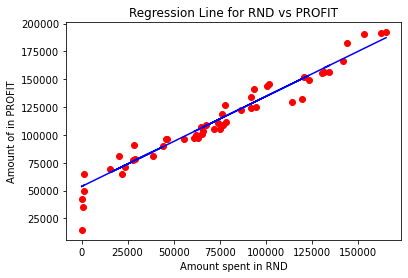

In [36]:
import matplotlib.pyplot as plt
plt.scatter(A.RND,A.PROFIT,c="red")
plt.plot(A.RND,b0+b1*A.RND,c="blue")
plt.xlabel("Amount spent in RND")
plt.ylabel("Amount of in PROFIT")
plt.title("Regression Line for RND vs PROFIT")